In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer

In [2]:
#pip install imperio


In [3]:
#pip show imperio

In [4]:
import imperio

In [5]:
data =pd.read_csv('Train.csv') 
test =pd.read_csv('Test.csv') 

In [6]:
data.head(10)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
5,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,23,apr,163.0,1.0,NaN,0,unknown,1
6,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,NaN,0,unknown,1
7,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,210.0,1.0,NaN,0,unknown,0
8,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,160.0,2.0,NaN,0,unknown,0
9,id_1406,50.0,blue-collar,married,secondary,no,407.0,yes,yes,cellular,7,aug,233.0,2.0,NaN,0,unknown,0


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

<AxesSubplot:>

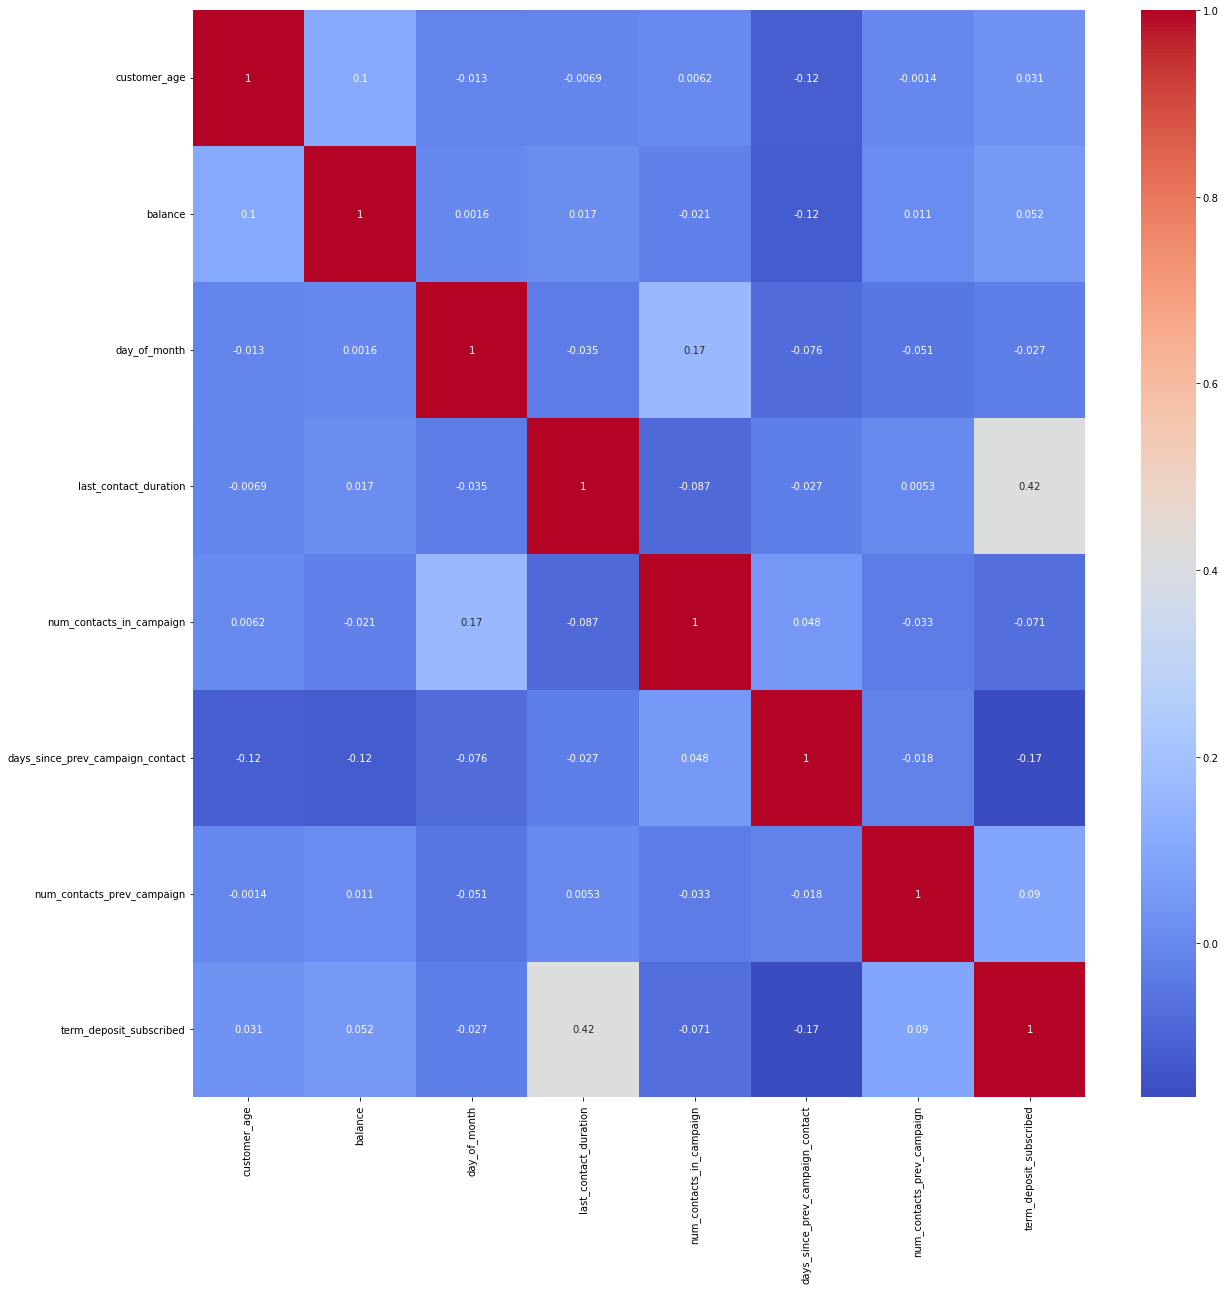

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm')

## Aducem coloanele in forma numerica

In [9]:
data = data.replace(to_replace =["single", "married","divorced","primary","secondary","tertiary","no","yes","unknown","cellular","telephone","other","failure"], value =[0,1,2,0,1,2,0,1,0,1,2,1,2])


In [10]:
data['marital'] = pd.to_numeric(data['marital'], errors='coerce')
data['prev_campaign_outcome'] = pd.to_numeric(data['prev_campaign_outcome'], errors='coerce')

In [11]:
data.head(30)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,0.0,2,0,285.0,1,0.0,0,26,jun,303.0,4.0,NaN,0,0.0,0
1,id_32289,34.0,blue-collar,1.0,1,0,934.0,0,1.0,1,18,nov,143.0,2.0,132.0,1,1.0,0
2,id_10523,46.0,technician,1.0,1,0,656.0,0,0.0,1,5,feb,101.0,4.0,NaN,0,0.0,0
3,id_43951,34.0,services,0.0,1,0,2.0,1,0.0,0,20,may,127.0,3.0,NaN,0,0.0,0
4,id_40992,41.0,blue-collar,1.0,0,0,1352.0,1,0.0,1,13,may,49.0,2.0,NaN,0,0.0,0
5,id_12681,65.0,retired,1.0,0,0,2880.0,0,0.0,1,23,apr,163.0,1.0,NaN,0,0.0,1
6,id_41178,57.0,blue-collar,1.0,0,0,495.0,0,0.0,1,18,aug,687.0,4.0,NaN,0,0.0,1
7,id_35102,37.0,management,1.0,2,0,650.0,1,NaN,0,26,may,210.0,1.0,NaN,0,0.0,0
8,id_34750,29.0,technician,1.0,1,0,265.0,1,0.0,1,19,aug,160.0,2.0,NaN,0,0.0,0
9,id_1406,50.0,blue-collar,1.0,1,0,407.0,1,1.0,1,7,aug,233.0,2.0,NaN,0,0.0,0


In [12]:
data.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                1070
term_deposit_subscribed                 0
dtype: int64

In [13]:
data = data.drop("days_since_prev_campaign_contact",axis =1)

#### Am dat drop la coloana cu cele mai multe date lipsa,luand in consideratie si faptul ca are o corelatie de -0.17

In [14]:
y = data["term_deposit_subscribed"]   
X =  data.drop(["id","term_deposit_subscribed"],axis=1)
#X = X[~X.isnull()]

#### Verificam numarul de date lipsa

In [15]:
X.isnull().sum()

customer_age                   619
job_type                         0
marital                        150
education                        0
default                          0
balance                        399
housing_loan                     0
personal_loan                  149
communication_type               0
day_of_month                     0
month                            0
last_contact_duration          311
num_contacts_in_campaign       112
num_contacts_prev_campaign       0
prev_campaign_outcome         1070
dtype: int64

#### date lipsesc doar in coloanele de tip numeric

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                31028 non-null  float64
 1   job_type                    31647 non-null  object 
 2   marital                     31497 non-null  float64
 3   education                   31647 non-null  int64  
 4   default                     31647 non-null  int64  
 5   balance                     31248 non-null  float64
 6   housing_loan                31647 non-null  int64  
 7   personal_loan               31498 non-null  float64
 8   communication_type          31647 non-null  int64  
 9   day_of_month                31647 non-null  int64  
 10  month                       31647 non-null  object 
 11  last_contact_duration       31336 non-null  float64
 12  num_contacts_in_campaign    31535 non-null  float64
 13  num_contacts_prev_campaign  316

##### Observam ca coloanele de tip object nu au valori nule,deci v-om imparti datasetul in 2 subseturi,unul cu date numerice, altul cu date object, pentru a putea face imput la datele nule

In [17]:
data_object = X.select_dtypes(include=['object'])
data_numeric = X.select_dtypes(exclude=['object'])

In [18]:
from sklearn.impute import IterativeImputer
it_imp = IterativeImputer(random_state=0)
data_numeric = pd.DataFrame(it_imp.fit_transform(data_numeric),columns = data_numeric.columns)

In [19]:
data_numeric.isnull().sum()

customer_age                  0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64

#### Toate valorile nule au fost eliminate
#### Iar acum concatinam subseturile inapoi

In [20]:
X = pd.concat([data_numeric, data_object], axis="columns") 

In [21]:
X.columns

Index(['customer_age', 'marital', 'education', 'default', 'balance',
       'housing_loan', 'personal_loan', 'communication_type', 'day_of_month',
       'last_contact_duration', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign', 'prev_campaign_outcome', 'job_type',
       'month'],
      dtype='object')

In [22]:
X.dtypes

customer_age                  float64
marital                       float64
education                     float64
default                       float64
balance                       float64
housing_loan                  float64
personal_loan                 float64
communication_type            float64
day_of_month                  float64
last_contact_duration         float64
num_contacts_in_campaign      float64
num_contacts_prev_campaign    float64
prev_campaign_outcome         float64
job_type                       object
month                          object
dtype: object

In [23]:
frequency=X['job_type'].value_counts()
frequency

blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
0                 199
Name: job_type, dtype: int64

In [24]:
for col in ['job_type', 'month']:
    X[col] = X[col].astype('str')

In [25]:
X.dtypes

customer_age                  float64
marital                       float64
education                     float64
default                       float64
balance                       float64
housing_loan                  float64
personal_loan                 float64
communication_type            float64
day_of_month                  float64
last_contact_duration         float64
num_contacts_in_campaign      float64
num_contacts_prev_campaign    float64
prev_campaign_outcome         float64
job_type                       object
month                          object
dtype: object

#### Facem label encoding pentru a inlocui datele de tip object

In [26]:
from sklearn.preprocessing import LabelEncoder
#X["job_type"].unique()
lbl_enc=LabelEncoder()
X["job_type"]=lbl_enc.fit_transform(X["job_type"])
X["month"]=lbl_enc.fit_transform(X["month"])

In [27]:
X.dtypes

customer_age                  float64
marital                       float64
education                     float64
default                       float64
balance                       float64
housing_loan                  float64
personal_loan                 float64
communication_type            float64
day_of_month                  float64
last_contact_duration         float64
num_contacts_in_campaign      float64
num_contacts_prev_campaign    float64
prev_campaign_outcome         float64
job_type                        int32
month                           int32
dtype: object

<AxesSubplot:>

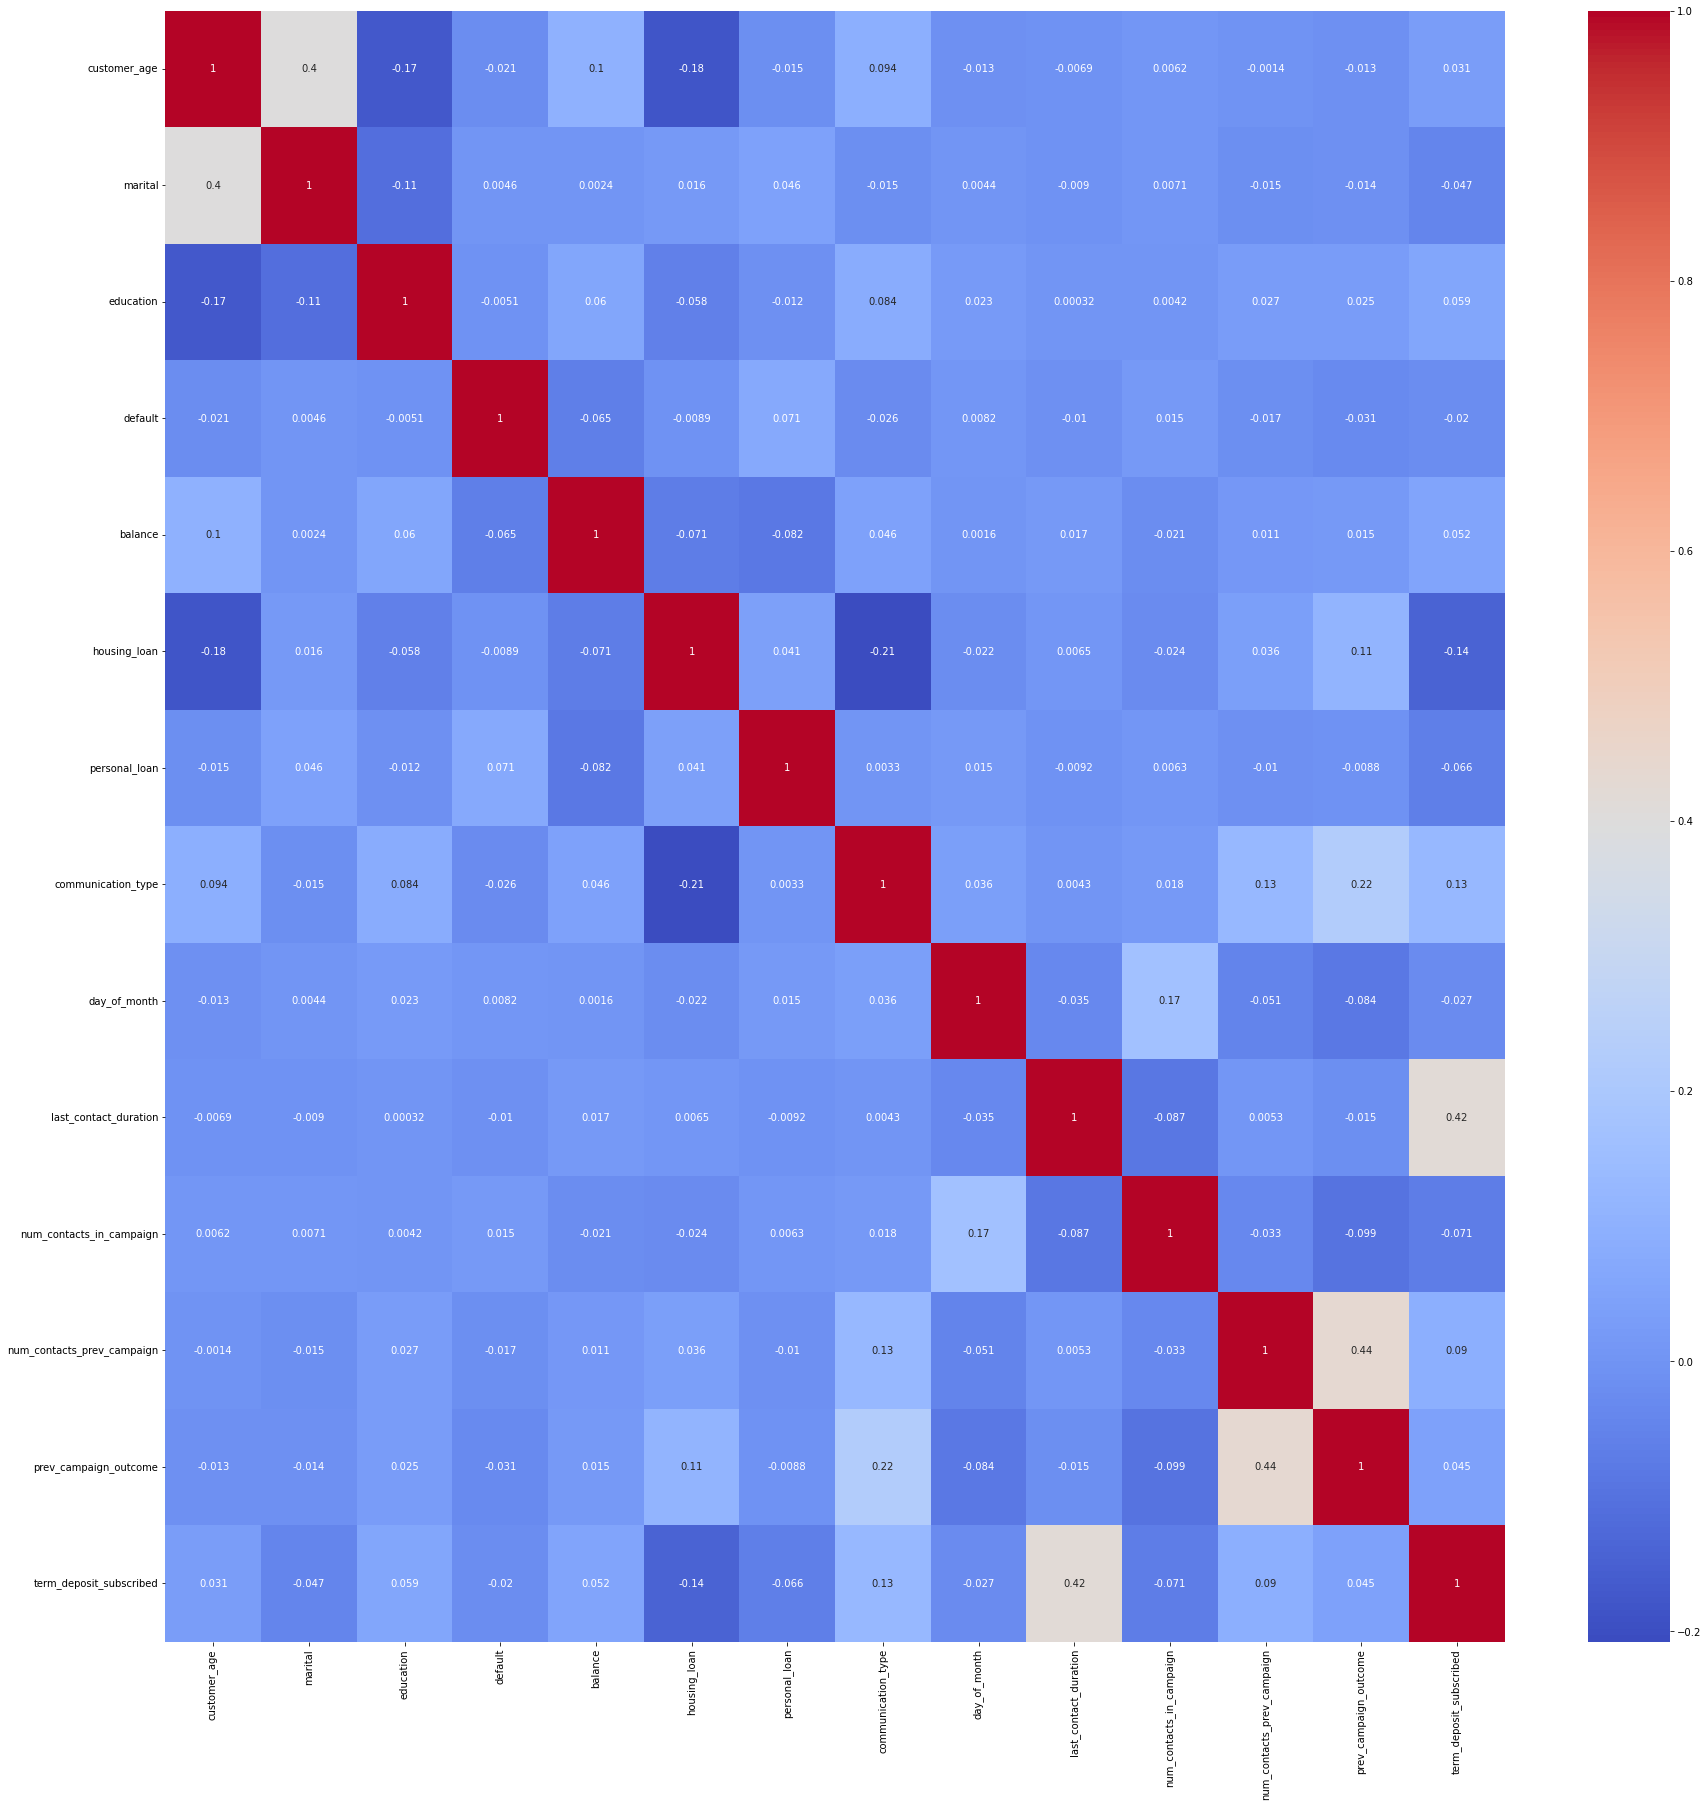

In [28]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm')

#### dupa label encoding,ultimele coloane au devenit int, iar in diagrama de corelatie sunt prezente toate coloanele


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=42)

In [30]:
X.head()

,customer_age,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,job_type,month
0,28.0,0.0,2.0,0.0,285.0,1.0,0.0,0.0,26.0,303.0,4.0,0.0,0.0,5,6
1,34.0,1.0,1.0,0.0,934.0,0.0,1.0,1.0,18.0,143.0,2.0,1.0,1.0,2,9
2,46.0,1.0,1.0,0.0,656.0,0.0,0.0,1.0,5.0,101.0,4.0,0.0,0.0,10,3
3,34.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,20.0,127.0,3.0,0.0,0.0,8,8
4,41.0,1.0,0.0,0.0,1352.0,1.0,0.0,1.0,13.0,49.0,2.0,0.0,0.0,2,8


In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(f"Logistic Regression : {lr_acc_score*100}%")

Logistic Regression : 89.90441583063433%


### Acuratetea dupa encoding si inputare

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set ()
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

### cautam cel mai optimal numar de clustere pentru GMM

In [33]:
gmm_sil = []
for i in range (2,10):
    GMM = GaussianMixture (n_components =i)
    GMM.fit(X)
    cluster = GMM.predict(X)
    # cluster_p = GMM.predict_proba(X)
    # cluster_p
    gmm_sil.append(silhouette_score(X,cluster))

In [34]:
gmm_sil

[-0.11981102075508797,
 -0.2892755354444281,
 -0.2514558011211062,
 -0.3331073909013636,
 -0.3411737290062504,
 -0.3461926835550163,
 -0.33180746758927515,
 -0.18600024407033192]

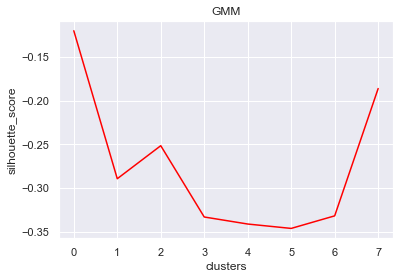

In [35]:
x_plot = np.arange(0,len(gmm_sil))
y_plot = gmm_sil
 
plt.title("GMM")
plt.xlabel("clusters")
plt.ylabel("silhouette_score")
plt.plot(x_plot, y_plot, color ="red")
plt.show()

### 4 este cea mai optimala valoare
### Deja cautam cel mai optimal numar de clustere pentru KMeans

In [36]:
kmean_sil = []
for i in range (2,10):
    kmeans= KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    cluster = kmeans.predict(X)
    # cluster_p = GMM.predict_proba(X)
    # cluster_p
    kmean_sil.append(silhouette_score(X,cluster))

In [37]:
kmean_sil

[0.8493004647740933,
 0.7786478675420557,
 0.7380763392677486,
 0.6906618047596443,
 0.6359034063020582,
 0.6050868480946856,
 0.5801512218133588,
 0.5257878358819216]

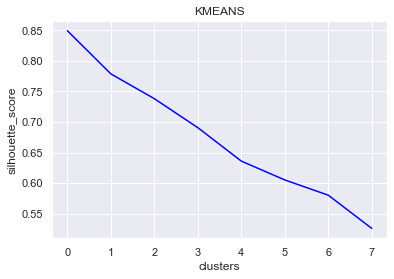

In [38]:
x_plot = np.arange(0,len(gmm_sil))
y_plot = kmean_sil
 
plt.title("KMEANS")
plt.xlabel("clusters")
plt.ylabel("silhouette_score")
plt.plot(x_plot, y_plot, color ="blue")
plt.show()

#### In baza graficului nu putem intelege care este numarul optim de clustere
### vom folosi metoda Elbow pentru a gasi numarul optimal de clustere

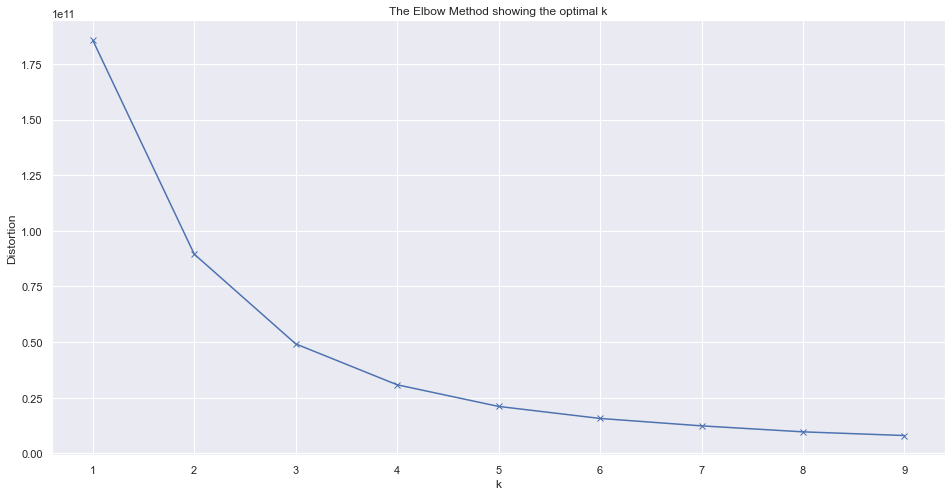

In [39]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)   
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    

#### numarul de 4 clustere este cel mai optimal 
### facem gruparea datelor utilizand ambele metode

In [40]:
kmeans = KMeans(
        init="random",
        n_clusters=4,
        n_init=10,
        max_iter=300,
        random_state=42 )

In [41]:
kmeans.fit(X)

KMeans(init='random', n_clusters=4, random_state=42)

In [42]:
label = kmeans.fit_predict(X)
label

array([0, 0, 0, ..., 0, 2, 0])

In [43]:
#sum of squared error
kmeans.inertia_

53766522703.59955

In [44]:
kmeans.cluster_centers_

array([[ 3.98573189e+01,  8.33387813e-01,  1.08889317e+00,
         2.11357074e-02,  4.57240481e+02,  5.76323388e-01,
         1.74281916e-01,  7.61501444e-01,  1.57726660e+01,
         2.52770427e+02,  2.80968331e+00,  5.69278152e-01,
         2.71616971e-01,  5.22652551e+00,  5.49659288e+00],
       [ 4.70471129e+01,  9.29203540e-01,  1.52212389e+00,
         3.46944695e-18,  3.26182389e+04,  3.62831858e-01,
         4.42477876e-02,  8.76106195e-01,  1.59911504e+01,
         2.33127214e+02,  2.37168142e+00,  5.22123894e-01,
         2.66407589e-01,  5.64601770e+00,  5.82300885e+00],
       [ 4.29941318e+01,  8.52545565e-01,  1.14733406e+00,
         8.70511425e-04,  3.74062986e+03,  4.92274211e-01,
         1.01979832e-01,  8.32644178e-01,  1.60702938e+01,
         2.74108677e+02,  2.62801648e+00,  7.22524483e-01,
         3.25614624e-01,  5.30598477e+00,  5.66441785e+00],
       [ 4.31608306e+01,  8.19110666e-01,  1.20435685e+00,
        -3.81639165e-17,  1.09276815e+04,  4.42946058

In [45]:
kmeans.n_iter_

41

In [54]:
kmeans.labels_[:5]

array([0, 0, 0, 0, 0])

In [47]:
kmeans_silhouette = silhouette_score(
        X, kmeans.labels_
    ).round(2)
kmeans_silhouette

0.7

In [48]:
GMM = GaussianMixture (n_components =4)
GMM.fit(X)
cluster = GMM.predict(X)
GMM_silhouette = silhouette_score(X,cluster)

In [49]:
GMM_silhouette

-0.18396671031190187

### observam ca pentru acelasi numar de clustere, KMeans are un rezultat mai bun
### Gasim centrele clusterelor din KMeans

In [53]:
kmeans.cluster_centers_

array([[ 3.98573189e+01,  8.33387813e-01,  1.08889317e+00,
         2.11357074e-02,  4.57240481e+02,  5.76323388e-01,
         1.74281916e-01,  7.61501444e-01,  1.57726660e+01,
         2.52770427e+02,  2.80968331e+00,  5.69278152e-01,
         2.71616971e-01,  5.22652551e+00,  5.49659288e+00],
       [ 4.70471129e+01,  9.29203540e-01,  1.52212389e+00,
         3.46944695e-18,  3.26182389e+04,  3.62831858e-01,
         4.42477876e-02,  8.76106195e-01,  1.59911504e+01,
         2.33127214e+02,  2.37168142e+00,  5.22123894e-01,
         2.66407589e-01,  5.64601770e+00,  5.82300885e+00],
       [ 4.29941318e+01,  8.52545565e-01,  1.14733406e+00,
         8.70511425e-04,  3.74062986e+03,  4.92274211e-01,
         1.01979832e-01,  8.32644178e-01,  1.60702938e+01,
         2.74108677e+02,  2.62801648e+00,  7.22524483e-01,
         3.25614624e-01,  5.30598477e+00,  5.66441785e+00],
       [ 4.31608306e+01,  8.19110666e-01,  1.20435685e+00,
        -3.81639165e-17,  1.09276815e+04,  4.42946058

In [51]:
label0 = X[kmeans.labels_ == 0]
label1 = X[kmeans.labels_ == 1]
label2 = X[kmeans.labels_ == 2]

cols = filtered_label0.columns

plt.scatter(label_0[cols[0]], label_0[cols[1]], color = 'red')
plt.scatter(label_1[cols[0]], label_1[cols[1]], color = 'black')
plt.show()
 
#plotting the results
#plt.scatter(filtered_label0[:,1] , filtered_label0[:,2])
#plt.show()

NameError: name 'filtered_label0' is not defined

### Gasim valorile medii pentru GMM

In [52]:
GMM.means_

array([[3.91606085e+01, 8.34482028e-01, 1.08788624e+00, 6.66329979e-01,
        4.76285041e+02, 5.80668111e-01, 3.01348455e-01, 8.21513091e-01,
        1.55223776e+01, 2.32437047e+02, 3.18873644e+00, 5.42120609e+00,
        5.79453303e-01, 5.16772466e+00, 5.85836561e+00],
       [4.05577260e+01, 8.33764202e-01, 1.08938068e+00, 0.00000000e+00,
        1.27823936e+03, 5.38209229e-01, 0.00000000e+00, 7.05955719e-01,
        1.60778236e+01, 2.57750300e+02, 2.79372404e+00, 0.00000000e+00,
        0.00000000e+00, 5.27116779e+00, 5.44616645e+00],
       [4.21435669e+01, 8.45840975e-01, 1.18733936e+00, 0.00000000e+00,
        6.34978050e+03, 5.45549682e-01, 4.50528330e-01, 9.55694806e-01,
        1.74041795e+01, 2.13211838e+02, 6.60829466e+00, 9.72542736e-01,
        6.40628175e-01, 5.24716689e+00, 5.73555943e+00],
       [3.99231435e+01, 8.40083224e-01, 1.11960613e+00, 0.00000000e+00,
        6.73567535e+02, 6.13043134e-01, 4.89437223e-01, 9.05900029e-01,
        1.48741353e+01, 2.63381210e+0